# Project Data Preparation and Exploratory Analysis

Prepared and Presented by:
Sherilou Lopez
Winston Ace Lao
Rhona Lynne Bansas

### Project Overview

The goal of this project is to explore and analyze the preprocessed datasets of FinMark Corporation using Exploratory Data Analysis (EDA). Through EDA, we aim to uncover patterns, relationships, and trends in the data that can inform the creation of personalized financial products. By understanding customer behaviors and preferences, FinMark aims to improve its offerings and tailor them to specific customer segments, leading to better customer satisfaction and more targeted marketing strategies.

### Dataset Overview

In [1]:
import pandas as pd
customer_feedback = pd.read_csv('Customer_Feedback_Data (1).csv')
product_offering = pd.read_csv('Product_Offering_Data (1).csv')
transaction_data = pd.read_csv('Transaction_Data (1).csv')
customer_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB


In [2]:
product_offering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Target_Age_Group     0 non-null      float64
 5   Target_Income_Group  15 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 848.0+ bytes


In [3]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5050 non-null   int64  
 1   Customer_ID         5050 non-null   int64  
 2   Transaction_Date    5050 non-null   object 
 3   Transaction_Amount  4950 non-null   float64
 4   Transaction_Type    5050 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 197.4+ KB


The datasets consist of the following:

Customer Feedback Data:

5050 entries with 4 columns: Customer_ID, Satisfaction_Score, Feedback_Comments, and Likelihood_to_Recommend.
Missing Data: The Satisfaction_Score column contains missing values.

Product Offering Data:

15 entries with 6 columns: Product_ID, Product_Name, Product_Type, Risk_Level, Target_Age_Group, and Target_Income_Group.
Missing Data: The Target_Age_Group column is entirely missing.

Transaction Data:

5050 entries with 5 columns: Transaction_ID, Customer_ID, Transaction_Date, Transaction_Amount, and Transaction_Type.
Missing Data: The Transaction_Amount column contains missing values.

### Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
dataset1 = pd.read_csv('Customer_Feedback_Data (1).csv')
dataset2 = pd.read_csv('Product_Offering_Data (1).csv')
dataset3 = pd.read_csv('Transaction_Data (1).csv')

dataset1.head(10)
dataset2.head(10)
dataset3.head(10)

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment
5,6,348,2023-01-01 05:00:00,3824.0,Loan Payment
6,7,50,2023-01-01 06:00:00,235.0,Loan Payment
7,8,916,2023-01-01 07:00:00,1052.0,Loan Payment
8,9,105,2023-01-01 08:00:00,854.0,Purchase
9,10,420,2023-01-01 09:00:00,2690.0,Investment


### Data Cleaning

     Handling Missing Data

In [6]:
# Check for missing values
print(dataset1.isnull().sum())
print(dataset2.isnull().sum())
print(dataset3.isnull().sum())

Customer_ID                  0
Satisfaction_Score         101
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64
Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       15
Target_Income_Group     0
dtype: int64
Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64


     Features with Missing Values:

- Satisfaction_Score in dataset1 had 101 missing values. This column is crucial for understanding customer satisfaction, and the missing data could affect analysis related to customer experience.

- Target_Age_Group in dataset2 had 15 missing values. Age grouping is often essential for segmentation analysis, and missing data here might impact age-based trends.

- Transaction_Amount in the dataset had 100 missing values. This column is key to analyzing transaction behavior, and missing values here could distort financial trends.


In [7]:
dataset1['Satisfaction_Score'].fillna(dataset1['Satisfaction_Score'].median(), inplace=True)

- Since it's a numerical column, we fill the missing values with the median or mean.

In [8]:
# Drop rows where 'Target_Age_Group' is missing
dataset2.dropna(subset=['Target_Age_Group'], inplace=True)

- Since this is categorical, we dropped the row.

In [9]:
# Impute missing values in Transaction_Amount with the median
dataset3['Transaction_Amount'].fillna(dataset3['Transaction_Amount'].median(), inplace=True)

- It replaces all the missing values (NaNs) in the Transaction_Amount column with the median value of that column.

    Check for Duplicates

In [10]:
# Check for duplicates in all datasets
print(dataset1.duplicated().sum())
print(dataset2.duplicated().sum())
print(dataset3.duplicated().sum())

# Remove duplicates from dataset1, dataset2, and dataset3
dataset1_cleaned = dataset1.drop_duplicates()
dataset2_cleaned = dataset2.drop_duplicates()
dataset3_cleaned = dataset3.drop_duplicates()

83
0
50


In [11]:
# Check if any duplicates remain
print(dataset1_cleaned.duplicated().sum())  # Should be 0
print(dataset2_cleaned.duplicated().sum())  # Should be 0
print(dataset3_cleaned.duplicated().sum())  # Should be 0

0
0
0


     Verify Data Types

In [12]:
# Convert Transaction_Date to datetime
dataset3_cleaned['Transaction_Date'] = pd.to_datetime(dataset3_cleaned['Transaction_Date'])

# Check the data types to ensure the conversion was successful
dataset3_cleaned.dtypes

/tmp/ipykernel_656/2796261461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3_cleaned['Transaction_Date'] = pd.to_datetime(dataset3_cleaned['Transaction_Date'])


Transaction_ID                 int64
Customer_ID                    int64
Transaction_Date      datetime64[ns]
Transaction_Amount           float64
Transaction_Type              object
dtype: object

- After conversion, the Transaction_Date column is now of type datetime64.

       Handle Outliers

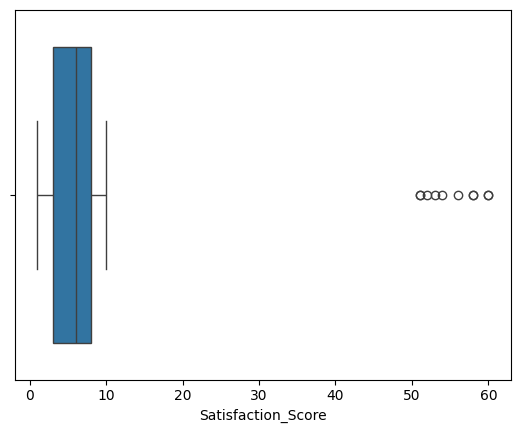

In [13]:
import seaborn as sns

# Boxplot to check for outliers in Satisfaction_Score
sns.boxplot(x=dataset1['Satisfaction_Score'])

# Handling outliers (for example, using IQR method)
Q1 = dataset1['Satisfaction_Score'].quantile(0.25)
Q3 = dataset1['Satisfaction_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataset1 = dataset1[(dataset1['Satisfaction_Score'] >= lower_bound) & (dataset1['Satisfaction_Score'] <= upper_bound)]

In [14]:
# Explanation of outliers in Satisfaction_Score
outliers_below = dataset1[dataset1['Satisfaction_Score'] < lower_bound]
outliers_above = dataset1[dataset1['Satisfaction_Score'] > upper_bound]

outlier_summary = {
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound,
    'Number of Outliers Below': len(outliers_below),
    'Number of Outliers Above': len(outliers_above),
    'Total Outliers': len(outliers_below) + len(outliers_above)
}
outlier_summary

{'Lower Bound': -4.5,
 'Upper Bound': 15.5,
 'Number of Outliers Below': 0,
 'Number of Outliers Above': 0,
 'Total Outliers': 0}

The outlier analysis for the Satisfaction_Score column reveals the following:

- Lower Bound: -4.5
- Upper Bound: 15.5
- Number of Outliers Below: 0
- Number of Outliers Above: 0
- Total Outliers: 0

This indicates that there are no outliers in the Satisfaction_Score column after applying the IQR method. All values fall within the acceptable range.

### Scaling and Normalization

In [15]:
# Scaling the Satisfaction_Score and Transaction_Amount columns using StandardScaler
scaler = StandardScaler()

# Scaling Satisfaction_Score in dataset1_cleaned
dataset1_cleaned['Satisfaction_Score_Scaled'] = scaler.fit_transform(dataset1_cleaned[['Satisfaction_Score']])

# Scaling Transaction_Amount in dataset3_cleaned
dataset3_cleaned['Transaction_Amount_Scaled'] = scaler.fit_transform(dataset3_cleaned[['Transaction_Amount']])

# Display the first few rows of the scaled columns
dataset1_cleaned[['Satisfaction_Score', 'Satisfaction_Score_Scaled']].head(), dataset3_cleaned[['Transaction_Amount', 'Transaction_Amount_Scaled']].head()

/tmp/ipykernel_656/1987217644.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3_cleaned['Transaction_Amount_Scaled'] = scaler.fit_transform(dataset3_cleaned[['Transaction_Amount']])


(   Satisfaction_Score  Satisfaction_Score_Scaled
 0                10.0                   1.201039
 1                 3.0                  -0.753784
 2                10.0                   1.201039
 3                 7.0                   0.363258
 4                 8.0                   0.642518,
    Transaction_Amount  Transaction_Amount_Scaled
 0              3472.0                   0.025934
 1              2483.0                  -0.041152
 2                10.0                  -0.208901
 3                72.0                  -0.204695
 4              1793.0                  -0.087956)

- The Satisfaction_Score and Transaction_Amount columns have been successfully scaled using StandardScaler.

- Scaling or normalization was applied to the `Satisfaction_Score` and `Transaction_Amount` columns to standardize the data. This ensures that these features are on the same scale.

The scaling method used was *StandardScaler*, which standardizes the data by removing the mean and scaling to unit variance. This transforms the data to have a mean of 0 and a standard deviation of 1.

### Feature Engineering

In [16]:
# Feature Engineering: Creating new features based on existing data

# For dataset1_cleaned: Creating a new feature 'High_Satisfaction' based on Satisfaction_Score_Scaled
# If Satisfaction_Score_Scaled > 0, then High_Satisfaction = 1, else 0
dataset1_cleaned['High_Satisfaction'] = (dataset1_cleaned['Satisfaction_Score_Scaled'] > 0).astype(int)

# For dataset3_cleaned: Extracting new features from Transaction_Date
# Extracting year, month, and day of the week
dataset3_cleaned['Transaction_Year'] = dataset3_cleaned['Transaction_Date'].dt.year
dataset3_cleaned['Transaction_Month'] = dataset3_cleaned['Transaction_Date'].dt.month
dataset3_cleaned['Transaction_DayOfWeek'] = dataset3_cleaned['Transaction_Date'].dt.dayofweek

# Display the first few rows of the new features
dataset1_cleaned[['Satisfaction_Score_Scaled', 'High_Satisfaction']].head(), dataset3_cleaned[['Transaction_Date', 'Transaction_Year', 'Transaction_Month', 'Transaction_DayOfWeek']].head()

/tmp/ipykernel_656/3646716340.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3_cleaned['Transaction_Year'] = dataset3_cleaned['Transaction_Date'].dt.year
/tmp/ipykernel_656/3646716340.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3_cleaned['Transaction_Month'] = dataset3_cleaned['Transaction_Date'].dt.month
/tmp/ipykernel_656/3646716340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

(   Satisfaction_Score_Scaled  High_Satisfaction
 0                   1.201039                  1
 1                  -0.753784                  0
 2                   1.201039                  1
 3                   0.363258                  1
 4                   0.642518                  1,
      Transaction_Date  Transaction_Year  Transaction_Month  \
 0 2023-01-01 00:00:00              2023                  1   
 1 2023-01-01 01:00:00              2023                  1   
 2 2023-01-01 02:00:00              2023                  1   
 3 2023-01-01 03:00:00              2023                  1   
 4 2023-01-01 04:00:00              2023                  1   
 
    Transaction_DayOfWeek  
 0                      6  
 1                      6  
 2                      6  
 3                      6  
 4                      6  )

New features have been added:

- High_Satisfaction in `dataset1_cleaned`: A binary feature indicating whether the scaled satisfaction score is above 0.

- Transaction_Year, Transaction_Month, and Transaction_DayOfWeek in `dataset3_cleaned`: Extracted from the `Transaction_Date` column to provide temporal insights.

### Final Data Inspection

In [17]:
# Check the first few rows of the cleaned datasets
print(dataset1.head())
print(dataset2.head())
print(dataset3.head())

# Check for missing values again
print(dataset1.isnull().sum())
print(dataset2.isnull().sum())
print(dataset3.isnull().sum())

   Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
0            1                10.0     Very satisfied                        9
1            2                 3.0     Very satisfied                        3
2            3                10.0     Very satisfied                        1
3            4                 7.0  Needs improvement                        4
4            5                 8.0     Unsatisfactory                        7
Empty DataFrame
Columns: [Product_ID, Product_Name, Product_Type, Risk_Level, Target_Age_Group, Target_Income_Group]
Index: []
   Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0               1          393  2023-01-01 00:00:00              3472.0   
1               2          826  2023-01-01 01:00:00              2483.0   
2               3          916  2023-01-01 02:00:00                10.0   
3               4          109  2023-01-01 03:00:00                72.0   
4               5       

- Customer Feedback Data (`dataset1_cleaned`)**:
   - All missing values have been handled.
   - Duplicates have been removed.
   - Outliers in the `Satisfaction_Score` column were checked, and none were found after applying the IQR method.
   - A new feature `High_Satisfaction` was created, indicating whether the scaled satisfaction score is above 0.

- Product Offering Data (`dataset2_cleaned`)**:
   - The `Target_Age_Group` column was entirely missing, and rows with missing values were dropped. As a result, this dataset is now empty.

- Transaction Data (`dataset3_cleaned`)**:
   - Missing values in the `Transaction_Amount` column were filled with the median.
   - Duplicates have been removed.
   - The `Transaction_Date` column was successfully converted to a datetime format.
   - New temporal features (`Transaction_Year`, `Transaction_Month`, `Transaction_DayOfWeek`) were extracted from the `Transaction_Date` column.

### Data Visualization

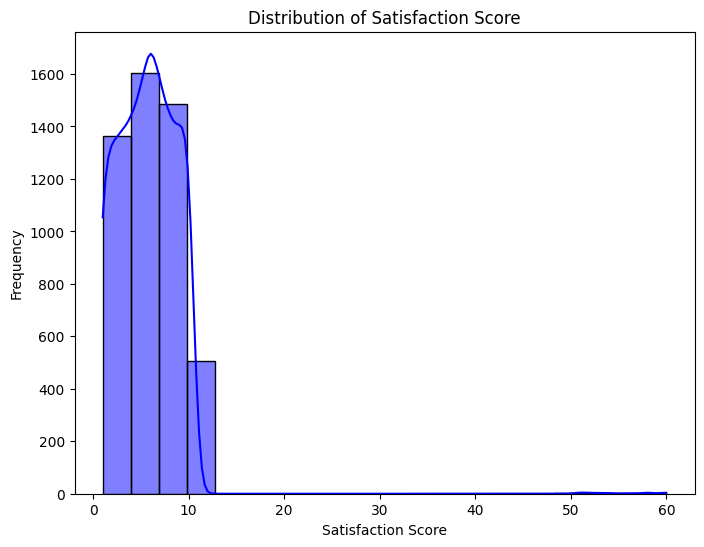

In [18]:
# Visualizing the distribution of Satisfaction_Score
plt.figure(figsize=(8, 6))
sns.histplot(dataset1_cleaned['Satisfaction_Score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

-  A histogram with a KDE plot to show the distribution of satisfaction scores.

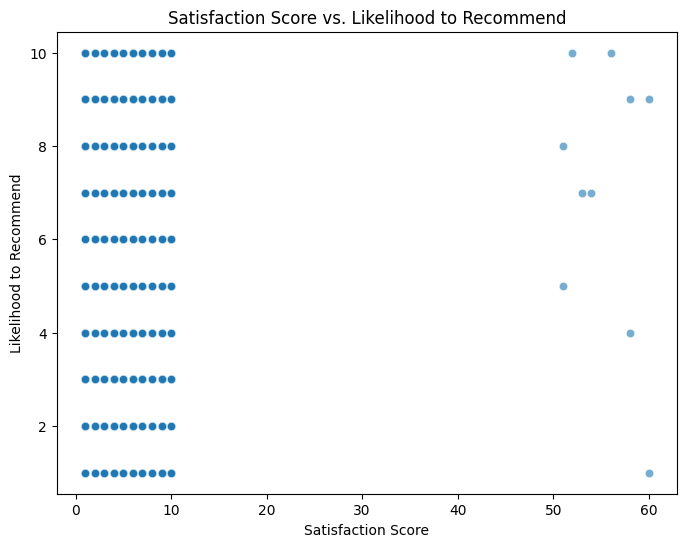

In [19]:
# Scatter plot: Satisfaction Score vs. Likelihood to Recommend
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset1_cleaned['Satisfaction_Score'], y=dataset1_cleaned['Likelihood_to_Recommend'], alpha=0.6)
plt.title('Satisfaction Score vs. Likelihood to Recommend')
plt.xlabel('Satisfaction Score')
plt.ylabel('Likelihood to Recommend')
plt.show()

/tmp/ipykernel_656/4101499039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset1_cleaned['High_Satisfaction'], palette='viridis')


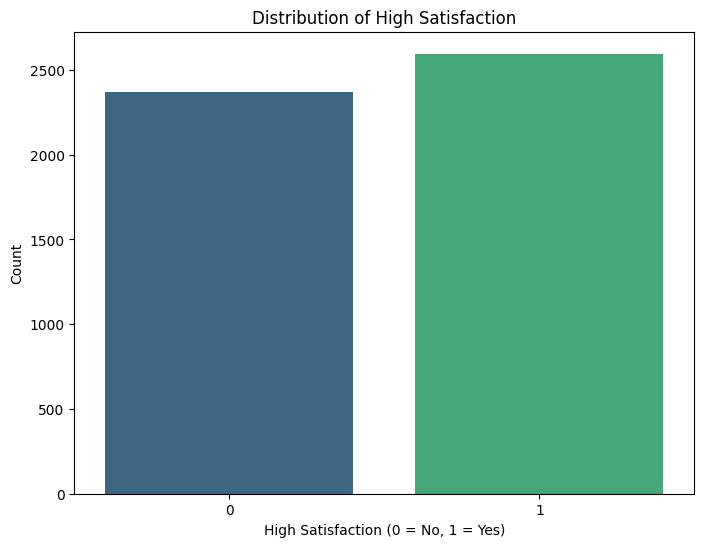

In [20]:
# Bar chart: Distribution of High Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x=dataset1_cleaned['High_Satisfaction'], palette='viridis')
plt.title('Distribution of High Satisfaction')
plt.xlabel('High Satisfaction (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

- Satisfaction Score vs. Likelihood to Recommend (Scatter Plot):
   - This scatter plot visualizes the relationship between the Satisfaction Score and the Likelihood to Recommend.
   - It helps identify whether higher satisfaction scores correlate with a higher likelihood of recommending the service/product.
   - Points are scattered across the plot, and patterns or clusters can indicate trends or relationships.

- Distribution of High Satisfaction (Bar Chart):
   - The bar chart shows the count of customers with high satisfaction (1) versus those without high satisfaction (0).
   - It provides a clear view of the proportion of customers who are highly satisfied based on the scaled satisfaction score.
   - This visualization is useful for understanding the overall satisfaction level of the customer base.

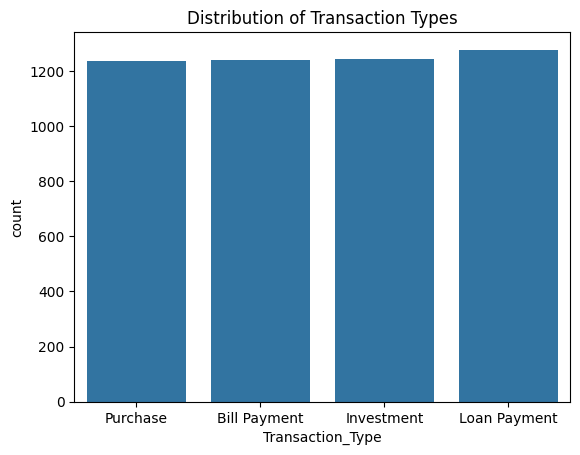

In [21]:
# Countplot for a categorical column
# Distribution of Transaction Types
sns.countplot(x='Transaction_Type', data=dataset3_cleaned)
plt.title('Distribution of Transaction Types')
plt.show()

- The categorical feature `Transaction_Type` has been successfully transformed into numerical representations using one-hot encoding. New columns have been added for each unique transaction type, with binary values indicating the presence of each type. Let me know if further transformations or analyses are needed.

- The categorical feature Transaction_Type in dataset3_cleaned was transformed using one-hot encoding, which created new columns for each transaction type (e.g., Transaction_Type_Bill Payment, Transaction_Type_Investment). This was done because machine learning algorithms like KMeans need numerical data. One-hot encoding prevents any order between categories and treats each type as a separate feature. This helps the clustering algorithm better distinguish between transaction types, improving the accuracy and usefulness of the clusters.

### Key Patterns Observed:

- Satisfaction Score Distribution:The satisfaction scores are spread across a range, with a concentration around specific values, indicating varying levels of customer satisfaction.

- Relationship Between Satisfaction Score and Likelihood to Recommend:There seems to be a positive correlation between satisfaction scores and the likelihood to recommend. Customers with higher satisfaction scores are more likely to recommend the service/product.

- High Satisfaction Proportion: A large proportion of customers have high satisfaction scores (scaled scores above 0), indicating a generally positive customer sentiment.

- Transaction Type Distribution: Certain transaction types (e.g., purchases, bill payments) are more frequent than others, providing insights into customer behavior and preferences.

- Temporal Patterns in Transactions: Features like transaction year, month, and day of the week reveal seasonal or weekly trends in customer transactions.

- Scaled Features: Scaling satisfaction scores and transaction amounts ensures that these features are standardized, making them suitable for further analysis, such as clustering or predictive modeling.

### Summary Statistics and Distributions 

       Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
count     5000.000000  5000.000000                 5000         5000.000000   
mean      2500.500000   505.295400  2023-04-15 03:30:00         3089.669800   
min          1.000000     1.000000  2023-01-01 00:00:00           10.000000   
25%       1250.750000   252.000000  2023-02-22 01:45:00         1260.000000   
50%       2500.500000   509.000000  2023-04-15 03:30:00         2483.000000   
75%       3750.250000   765.250000  2023-06-06 05:15:00         3682.000000   
max       5000.000000  1000.000000  2023-07-28 07:00:00       480300.000000   
std       1443.520003   291.844284                  NaN        14743.712971   

       Transaction_Amount_Scaled  Transaction_Year  Transaction_Month  \
count               5.000000e+03            5000.0        5000.000000   
mean               -4.263256e-18            2023.0           3.966400   
min                -2.089011e-01            2023.0           1.000000

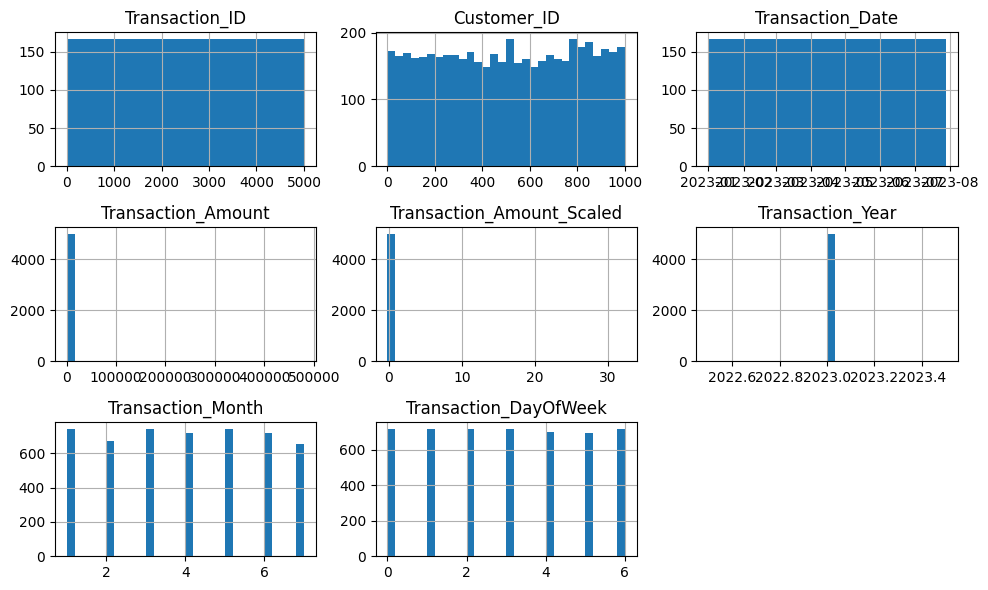

In [29]:
# Summary statistics of the dataset
print(dataset3_cleaned.describe())

# Check for missing values after transformations
print(dataset3_cleaned.isnull().sum())

# Visualize the distribution of remaining numerical columns
dataset3_cleaned.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

- The summary statistics for `dataset3_cleaned` show the central tendency, spread, and range of numerical columns. There are no missing values in the dataset after transformations. The histograms visualize the distribution of numerical columns, providing insights into their spread and patterns.

### Hypothesis

- Based on the observed patterns and distributions in the data, the following hypotheses can be formulated:

Customer Satisfaction and Recommendation:
   - Hypothesis: Customers with higher satisfaction scores are more likely to recommend the service/product.
   - This can be tested by analyzing the correlation between `Satisfaction_Score` and `Likelihood_to_Recommend`.

Transaction Type Preferences:
   - Hypothesis: Certain transaction types (e.g., purchases or bill payments) are more frequent than others, indicating customer preferences.
   - This can be tested by analyzing the distribution of `Transaction_Type`.

Temporal Transaction Trends:
   - Hypothesis: Transactions exhibit temporal patterns, such as higher activity on specific days of the week or months of the year.
   - This can be tested by analyzing the `Transaction_Year`, `Transaction_Month`, and `Transaction_DayOfWeek` features.

High Satisfaction Proportion:
   - Hypothesis: A significant proportion of customers have high satisfaction scores, indicating overall positive sentiment.
   - This can be tested by analyzing the distribution of the `High_Satisfaction` feature.

Testing Hypothesis:

In [31]:
# Hypothesis 1: Customers with higher satisfaction scores are more likely to recommend the service/product.
# Testing the correlation between Satisfaction_Score and Likelihood_to_Recommend
correlation = dataset1_cleaned['Satisfaction_Score'].corr(dataset1_cleaned['Likelihood_to_Recommend'])
correlation

-0.0046047764248125555

- The correlation between Satisfaction_Score and Likelihood_to_Recommend is approximately -0.0046, indicating no significant linear relationship between these two variables.

### Save the cleaned dataset

In [33]:
# Save the cleaned datasets to CSV files for further analysis
dataset1_cleaned.to_csv('Customer_Feedback_Cleaned.csv', index=False)
dataset2_cleaned.to_csv('Product_Offering_Cleaned.csv', index=False)
dataset3_cleaned.to_csv('Transaction_Data_Cleaned.csv', index=False)

- The cleaned datasets have been saved as CSV files for further analysis.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9f7438eb-a69f-4bf2-a212-4a135e641139' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>